<a href="https://colab.research.google.com/github/FabricioLealRS/potencial_clinicas_fisioterapia/blob/Code/Trabalho_grupo_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
!pip install unidecode
!pip install geopandas
import pandas as pd
import os
import unidecode
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
import io

# Lista das URLs dos arquivos brutos ('raw') no GitHub
urls = [
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Acidentes_de_transito.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Estabelecimentos.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Municipios.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Populacao_residente.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Procedimentos_hospitalares_ARTICULACOES.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Procedimentos_hospitalares_AVC.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Procedimentos_hospitalares_CONDICOESNAUROLOGICAS.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Procedimentos_hospitalares_DOENCASCRONICAS.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Procedimentos_hospitalares_ORTOPEDICAS.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Qtd_beneficiarios_planosdesaude.csv'
]

# Dicionário que vai armazenar os dataframes
dfs = {}

for url in urls:
    # Lê o arquivo CSV
    df = pd.read_csv(url, sep=';')

    # Remove a extensão .csv do nome do arquivo para usar como chave
    chave = os.path.splitext(os.path.basename(url))[0]

    # Armazena o dataframe no dicionário
    dfs[chave] = df

# Agora você pode acessar cada dataframe através da chave correspondente
# Por exemplo, para ver as primeiras linhas do dataframe 'Acidentes_de_transito', você pode fazer:
print(dfs['Acidentes_de_transito'].head(10))



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-214-3f209c07fb38>:31: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=';')


     Município de ocorrência  Total
0        110040 Alto Paraíso      1
1           110002 Ariquemes      4
2             110045 Buritis      1
3  110080 Candeias do Jamari     24
4             110094 Cujubim      2
5       110010 Guajará-Mirim      5
6     110110 Itapuã do Oeste      5
7                110011 Jaru      1
8           110012 Ji-Paraná      1
9  110013 Machadinho D'Oeste      1


In [215]:
# Iterar sobre todas as chaves do dicionário dfs
for key, df in dfs.items():
    print(f"DataFrame: {key}")
    for column, dtype in df.dtypes.iteritems():
        print(f"Coluna: {column} | Tipo de dado: {dtype}")
    print("\n")

DataFrame: Acidentes_de_transito
Coluna: Município de ocorrência | Tipo de dado: object
Coluna: Total | Tipo de dado: int64


DataFrame: Estabelecimentos
Coluna: CNPJ BÃƒÂSICO | Tipo de dado: float64
Coluna: CNPJ ORDEM | Tipo de dado: int64
Coluna: CNPJ DV | Tipo de dado: int64
Coluna: IDENTIFICADOR M-F | Tipo de dado: int64
Coluna: NOME FANTASIA | Tipo de dado: object
Coluna: SITUACAO CADASTRAL | Tipo de dado: int64
Coluna: DATA SITUACAO | Tipo de dado: int64
Coluna: MOTIVOSITUACAO | Tipo de dado: int64
Coluna: NOME CIDADE EXTERIOR | Tipo de dado: object
Coluna: PAIS | Tipo de dado: float64
Coluna: DATA INICIO ATIVIDADE | Tipo de dado: int64
Coluna: CNAE PRINCIPAL | Tipo de dado: int64
Coluna: CNAE SECUNDARIO | Tipo de dado: object
Coluna: TIPO LOGRADOURO | Tipo de dado: object
Coluna: LOGRADOURO | Tipo de dado: object
Coluna: NUMERO | Tipo de dado: object
Coluna: COMPLEMENTO | Tipo de dado: object
Coluna: BAIRRO | Tipo de dado: object
Coluna: CEP | Tipo de dado: float64
Coluna: UF |

<ipython-input-215-e54eb124ea49>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in df.dtypes.iteritems():


In [216]:
# Iterar sobre todas as chaves do dicionário dfs
for key, df in dfs.items():
    print(f"DataFrame: {key}")

    if key == 'Acidentes_de_transito':
        print("Coluna: Município de ocorrência | Tipo de dado: string")

    elif key in ['Municipios', 'Populacao_residente', 'Procedimentos_hospitalares_ARTICULACOES',
                'Procedimentos_hospitalares_AVC', 'Procedimentos_hospitalares_CONDICOESNAUROLOGICAS',
                'Procedimentos_hospitalares_DOENCASCRONICAS', 'Procedimentos_hospitalares_ORTOPEDICAS',
                'Qtd_beneficiarios_planosdesaude']:
        print(f"Coluna: Municipio | Tipo de dado: string")

    else:
        for column, dtype in df.dtypes.iteritems():
            if dtype == 'object':
                print(f"Coluna: {column} | Tipo de dado: string")
            else:
                print(f"Coluna: {column} | Tipo de dado: {dtype}")

    print("\n")



DataFrame: Acidentes_de_transito
Coluna: Município de ocorrência | Tipo de dado: string


DataFrame: Estabelecimentos
Coluna: CNPJ BÃƒÂSICO | Tipo de dado: float64
Coluna: CNPJ ORDEM | Tipo de dado: int64
Coluna: CNPJ DV | Tipo de dado: int64
Coluna: IDENTIFICADOR M-F | Tipo de dado: int64
Coluna: NOME FANTASIA | Tipo de dado: string
Coluna: SITUACAO CADASTRAL | Tipo de dado: int64
Coluna: DATA SITUACAO | Tipo de dado: int64
Coluna: MOTIVOSITUACAO | Tipo de dado: int64
Coluna: NOME CIDADE EXTERIOR | Tipo de dado: string
Coluna: PAIS | Tipo de dado: float64
Coluna: DATA INICIO ATIVIDADE | Tipo de dado: int64
Coluna: CNAE PRINCIPAL | Tipo de dado: int64
Coluna: CNAE SECUNDARIO | Tipo de dado: string
Coluna: TIPO LOGRADOURO | Tipo de dado: string
Coluna: LOGRADOURO | Tipo de dado: string
Coluna: NUMERO | Tipo de dado: string
Coluna: COMPLEMENTO | Tipo de dado: string
Coluna: BAIRRO | Tipo de dado: string
Coluna: CEP | Tipo de dado: float64
Coluna: UF | Tipo de dado: string
Coluna: MUNICI

<ipython-input-216-8c699e106f52>:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in df.dtypes.iteritems():


In [217]:
import unidecode

# Lista dos nomes dos dataframes que foram ajustados para tipo 'string'
df_names_to_adjust = [
    'Municipios',
    'Populacao_residente',
    'Procedimentos_hospitalares_ARTICULACOES',
    'Procedimentos_hospitalares_AVC',
    'Procedimentos_hospitalares_CONDICOESNAUROLOGICAS',
    'Procedimentos_hospitalares_DOENCASCRONICAS',
    'Procedimentos_hospitalares_ORTOPEDICAS',
    'Qtd_beneficiarios_planosdesaude'
]

# Iterar sobre todas as chaves do dicionário dfs
for key, df in dfs.items():
    print(f"DataFrame: {key}")

    if key in df_names_to_adjust:
        if 'Município' in df.columns and df['Município'].dtype == 'object':
            df['Município'] = df['Município'].apply(lambda x: unidecode.unidecode(x).lower())
            print(f"Coluna 'Município' ajustada.")

        elif 'Municipio' in df.columns and df['Municipio'].dtype == 'object':
            df['Municipio'] = df['Municipio'].apply(lambda x: unidecode.unidecode(x).lower())
            print(f"Coluna 'Municipio' ajustada.")

        elif 'MUNICIPIO' in df.columns and df['MUNICIPIO'].dtype == 'object':
            df['MUNICIPIO'] = df['MUNICIPIO'].apply(lambda x: unidecode.unidecode(x).lower())
            print(f"Coluna 'MUNICIPIO' ajustada.")

        else:
            print("Nenhuma coluna 'Município', 'Municipio' ou 'MUNICIPIO' encontrada ou o tipo de dado não é 'string'.")

    else:
        print("Este DataFrame não foi ajustado para tipo 'string'.")

    print("\n")




DataFrame: Acidentes_de_transito
Este DataFrame não foi ajustado para tipo 'string'.


DataFrame: Estabelecimentos
Este DataFrame não foi ajustado para tipo 'string'.


DataFrame: Municipios
Nenhuma coluna 'Município', 'Municipio' ou 'MUNICIPIO' encontrada ou o tipo de dado não é 'string'.


DataFrame: Populacao_residente
Coluna 'Municipio' ajustada.


DataFrame: Procedimentos_hospitalares_ARTICULACOES
Coluna 'Municipio' ajustada.


DataFrame: Procedimentos_hospitalares_AVC
Coluna 'Municipio' ajustada.


DataFrame: Procedimentos_hospitalares_CONDICOESNAUROLOGICAS
Coluna 'Municipio' ajustada.


DataFrame: Procedimentos_hospitalares_DOENCASCRONICAS
Coluna 'Municipio' ajustada.


DataFrame: Procedimentos_hospitalares_ORTOPEDICAS
Coluna 'Municipio' ajustada.


DataFrame: Qtd_beneficiarios_planosdesaude
Coluna 'Município' ajustada.




**União dos Dataframes de Procedimentos Hospitalares**

Primeiramente iremos realizar a união dos dataframes de procedimento hospitalar, esse passo é necessário, pois embora não seja possivel baixarmos um unica arquivo no site do governo, para melhor trabalho podemos realizar a união destes todos em um unico df chamado df_procedimentos_hospitalaresPRE

In [218]:
from google.colab import files

# Lista dos dataframes a serem unidos
dfnames = [
    'Procedimentos_hospitalares_ARTICULACOES',
    'Procedimentos_hospitalares_AVC',
    'Procedimentos_hospitalares_CONDICOESNAUROLOGICAS',
    'Procedimentos_hospitalares_DOENCASCRONICAS',
    'Procedimentos_hospitalares_ORTOPEDICAS'
]

# Inicializa o dataframe final com o primeiro dataframe da lista
df_procedimentos_hospitalares = dfs[dfnames[0]].rename(columns={'AIH_aprovadas': dfnames[0]})

# Itera sobre o resto dos dataframes
for name in dfnames[1:]:
    # Renomeia a coluna 'AIH_aprovadas' para o nome do dataframe e realiza a união
    df_procedimentos_hospitalares = df_procedimentos_hospitalares.merge(dfs[name].rename(columns={'AIH_aprovadas': name}), on='Municipio', how='outer')

# Remove a string 'Procedimentos_hospitalares_' dos nomes das outras colunas
df_procedimentos_hospitalares.columns = df_procedimentos_hospitalares.columns.str.replace('Procedimentos_hospitalares_', '')

# Split the 'Municipio' column into 'Codigo' and 'Nome'
df_procedimentos_hospitalares['Codigo'] = df_procedimentos_hospitalares['Municipio'].str.slice(0, 6)
df_procedimentos_hospitalares['Nome'] = df_procedimentos_hospitalares['Municipio'].str.slice(7)

# Remove the original 'Municipio' column
df_procedimentos_hospitalares = df_procedimentos_hospitalares.drop(columns=['Municipio'])

# Reorder the columns to put 'Codigo' and 'Nome' first
df_procedimentos_hospitalares = df_procedimentos_hospitalares[['Nome', 'Codigo'] + [col for col in df_procedimentos_hospitalares.columns if col not in ['Codigo', 'Nome']]]

# Substitui NaN por 0
df_procedimentos_hospitalares.fillna(0, inplace=True)

# Salva o dataframe ajustado em um arquivo CSV
df_procedimentos_hospitalares.to_csv('df_procedimentos_hospitalares.csv', index=False, sep=';')

# Baixa o arquivo CSV
files.download('df_procedimentos_hospitalares.csv')

# Exibe as primeiras linhas do dataframe final
df_procedimentos_hospitalares.head



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<bound method NDFrame.head of               Nome  Codigo  ARTICULACOES     AVC  CONDICOESNAUROLOGICAS  \
0      porto velho  110020           1.0   382.0                    7.0   
1           manaus  130260           2.0  1377.0                   89.0   
2       ananindeua  150080           1.0   213.0                    0.0   
3           maraba  150420          21.0    79.0                    0.0   
4         marituba  150442           1.0    30.0                    0.0   
...            ...     ...           ...     ...                    ...   
2895  bandeirantes  410240           0.0     0.0                    0.0   
2896       biguacu  420230           0.0     0.0                    0.0   
2897       itapema  420830           0.0     0.0                    0.0   
2898  timbe do sul  421810           0.0     0.0                    0.0   
2899    navegantes  421130           0.0     0.0                    0.0   

      DOENCASCRONICAS  ORTOPEDICAS  
0                17.0          1

**Ajuste do df de população residente**

In [219]:
# Acesse o dataframe 'Populacao_residente'
df_populacao = dfs['Populacao_residente']

# Imprime as primeiras linhas para entender sua estrutura
df_populacao.head()

# Remove a coluna 'total'
df_populacao = df_populacao.drop(columns=['Total'])

# Divide a coluna 'Municipio' em 'Codigo' e 'Nome'
df_populacao['Codigo'] = df_populacao['Municipio'].str.slice(0, 6)
df_populacao['Nome'] = df_populacao['Municipio'].str.slice(7)

# Remove a coluna 'Municipio'
df_populacao = df_populacao.drop(columns=['Municipio'])

# Reordena as colunas para colocar 'Codigo' e 'Nome' no início
df_populacao = df_populacao[['Nome', 'Codigo'] + [col for col in df_populacao.columns if col not in ['Codigo', 'Nome']]]

# Cria as novas colunas somando as colunas correspondentes
df_populacao['Menor que 1 a 9 anos'] = df_populacao['Menor 1 ano'] + df_populacao['1 a 4 anos'] + df_populacao['5 a 9 anos']
df_populacao['10 a 19 anos'] = df_populacao['10 a 14 anos'] + df_populacao['15 a 19 anos']

# Agora, se você desejar, pode excluir as colunas originais que foram somadas
df_populacao = df_populacao.drop(columns=['Menor 1 ano', '1 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos'])

# Substitui NaNs por 0s
df_populacao = df_populacao.fillna(0)

# Salva o dataframe ajustado em um arquivo CSV
df_populacao.to_csv('df_populacao.csv', index=False, sep=';')

# Baixa o arquivo CSV
files.download('df_populacao.csv')

# Imprime o dataframe atualizado
df_populacao.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Nome,Codigo,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Menor que 1 a 9 anos,10 a 19 anos
0,alta floresta d'oeste,110001,4235,3613,3238,2039,1211,680,169,3961,4923
1,ariquemes,110002,17901,14999,11762,7080,3772,1842,642,15966,18783
2,cabixi,110003,942,893,856,664,365,208,55,984,1165
3,cacoal,110004,14918,12806,10580,6808,3665,2055,818,12200,15480
4,cerejeiras,110005,2939,2543,2372,1450,976,514,174,2564,3320


**Ajuste do df de acidente de transito**

In [220]:
# Acessa o dataframe 'Acidentes_de_transito'
df_acidentes = dfs['Acidentes_de_transito']

# Divide a coluna 'Município de ocorrência' em 'Codigo' e 'Nome'
df_acidentes['Codigo'] = df_acidentes['Município de ocorrência'].str.slice(0, 6)
df_acidentes['Nome'] = df_acidentes['Município de ocorrência'].str.slice(7)

# Remove a coluna 'Município de ocorrência'
df_acidentes = df_acidentes.drop(columns=['Município de ocorrência'])

# Renomeia a coluna 'Total' para 'Acidentes de transito'
df_acidentes = df_acidentes.rename(columns={'Total': 'Acidentes de transito'})

# Reordena as colunas para colocar 'Codigo' e 'Nome' primeiro
df_acidentes = df_acidentes[['Nome', 'Codigo', 'Acidentes de transito']]

# Substitui NaNs por 0s
df_acidentes = df_acidentes.fillna(0)

# Salva o dataframe ajustado em um arquivo CSV
df_acidentes.to_csv('df_acidentes.csv', index=False, sep=';')

# Inicia o download do arquivo CSV
files.download('df_acidentes.csv')

# Imprime o dataframe atualizado
df_acidentes.head()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Nome,Codigo,Acidentes de transito
0,Alto Paraíso,110040,1
1,Ariquemes,110002,4
2,Buritis,110045,1
3,Candeias do Jamari,110080,24
4,Cujubim,110094,2


**Ajuste do df de Quantidade de Beneficiários do Plano de Saúde**

In [221]:
# Acessa o dataframe 'Qtd_beneficiarios_planosdesaude'
df_planos = dfs['Qtd_beneficiarios_planosdesaude']

# Divide a coluna 'Município' em 'Codigo' e 'Nome'
df_planos['Codigo'] = df_planos['Município'].str.slice(0, 6)
df_planos['Nome'] = df_planos['Município'].str.slice(7)

# Remove as colunas 'Município', 'Inconsistente' e 'Total'
df_planos = df_planos.drop(columns=['Município', 'Inconsistente', 'Total'])

# Cria novas colunas somando as colunas desejadas
df_planos['Menor que 1 a 9 anos'] = df_planos['Até 1 ano'] + df_planos['1 a 4 anos'] + df_planos['5 a 9 anos']
df_planos['10 a 19 anos'] = df_planos['10 a 14 anos'] + df_planos['15 a 19 anos']
df_planos['20 a 29 anos'] = df_planos['20 a 24 anos'] + df_planos['25 a 29 anos']
df_planos['30 a 39 anos'] = df_planos['30 a 34 anos'] + df_planos['35 a 39 anos']
df_planos['40 a 49 anos'] = df_planos['40 a 44 anos'] + df_planos['45 a 49 anos']
df_planos['50 a 59 anos'] = df_planos['50 a 54 anos'] + df_planos['55 a 59 anos']
df_planos['60 a 69 anos'] = df_planos['60 a 64 anos'] + df_planos['65 a 69 anos']
df_planos['70 a 79 anos'] = df_planos['70 a 74 anos'] + df_planos['75 a 79 anos']

# Renomeia a coluna '80 anos ou mais'
df_planos = df_planos.rename(columns={'80 anos ou mais': '80 anos e mais'})

# Remove as colunas originais
df_planos = df_planos.drop(columns=['Até 1 ano', '1 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos',
                                    '20 a 24 anos', '25 a 29 anos', '30 a 34 anos', '35 a 39 anos', '40 a 44 anos',
                                    '45 a 49 anos', '50 a 54 anos', '55 a 59 anos', '60 a 64 anos', '65 a 69 anos',
                                    '70 a 74 anos', '75 a 79 anos'])

# Reordena as colunas para colocar 'Codigo' e 'Nome' primeiro
df_planos = df_planos[['Nome', 'Codigo'] + [col for col in df_planos.columns if col not in ['Codigo', 'Nome']]]

# Substitui NaNs por 0s
df_planos = df_planos.fillna(0)

# Salva o dataframe ajustado em um arquivo CSV
df_planos.to_csv('df_planos.csv', index=False, sep=';')

# Inicia o download do arquivo CSV
files.download('df_planos.csv')

# Imprime o dataframe atualizado
df_planos.head()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Nome,Codigo,80 anos e mais,Menor que 1 a 9 anos,10 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos
0,alta floresta d'oeste,110001,79,2235,1982,2731,3023,1872,1046,387,170
1,alto alegre dos parecis,110037,0,7,20,14,15,26,5,0,0
2,alto paraiso,110040,0,69,87,55,74,83,43,11,4
3,alvorada d'oeste,110034,3,83,125,92,93,128,75,34,6
4,ariquemes,110002,47,936,1070,1471,1376,1276,1000,381,160


**Ajuste do df de Estabelecimentos**

In [222]:
df_empresas = dfs['Estabelecimentos']

# Lista de colunas a serem excluídas
cols_to_drop = [
    'CNPJ BÃƒÂSICO',
    'CNPJ ORDEM',
    'CNPJ DV',
    'IDENTIFICADOR M-F',
    'NOME FANTASIA',
    'MOTIVOSITUACAO',
    'NOME CIDADE EXTERIOR',
    'PAIS',
    'CNAE SECUNDARIO',
    'TIPO LOGRADOURO',
    'LOGRADOURO',
    'NUMERO',
    'COMPLEMENTO',
    'BAIRRO',
    'CEP',
    'DDD1',
    'TELEFONE1',
    'DDD2',
    'TELEFONE2',
    'DDD FAX',
    'FAX',
    'CORREIO',
    'SITUACAO ESPECIAL',
    'DATASITUCACAO ESPECIAL',
    'CNPJ BÃSICO'
]

# Remove as colunas
df_empresas = df_empresas.drop(columns=cols_to_drop)

# Substitui NaNs por 0s
df_empresas = df_empresas.fillna(0)

# Mostra as primeiras linhas do dataframe atualizado
df_empresas.head()

,SITUACAO CADASTRAL,DATA SITUACAO,DATA INICIO ATIVIDADE,CNAE PRINCIPAL,UF,MUNICIPIO
0,8,20160624,20151116,8650003,SC,8183
1,2,20200428,20151117,8650003,PI,1219
2,8,20190722,20150709,8650003,PA,427
3,2,20151127,20151127,8650003,PR,7915
4,8,20180308,20151126,8650003,DF,9701


In [223]:
# Create a series with the 'MUNICIPIO' column as index and the 'NOME MUNICIPIO' column as values
nome_municipios = dfs['Municipios'].set_index('MUNICIPIO')['NOME MUNICIPIO']

# Replace the values in the 'MUNICIPIO' column of the 'Estabelecimentos' dataframe using the created series
df_empresas['MUNICIPIO'] = df_empresas['MUNICIPIO'].map(nome_municipios)

# Show the first few rows of the updated DataFrame
df_empresas.head()


,SITUACAO CADASTRAL,DATA SITUACAO,DATA INICIO ATIVIDADE,CNAE PRINCIPAL,UF,MUNICIPIO
0,8,20160624,20151116,8650003,SC,LAGES
1,2,20200428,20151117,8650003,PI,TERESINA
2,8,20190722,20150709,8650003,PA,BELEM
3,2,20151127,20151127,8650003,PR,TELEMACO BORBA
4,8,20180308,20151126,8650003,DF,BRASILIA


In [224]:
# Dictionary to replace values in the 'SITUACAO CADASTRAL' column
situacao_cadastral_map = {
    1: 'NULA',
    2: 'ATIVA',
    3: 'SUSPENSA',
    4: 'INAPTA',
    8: 'BAIXADA'
}

# Replace the values in the 'SITUACAO CADASTRAL' column using the dictionary
df_empresas['SITUACAO CADASTRAL'] = df_empresas['SITUACAO CADASTRAL'].map(situacao_cadastral_map)

# Show the first few rows of the updated DataFrame
df_empresas.head()


,SITUACAO CADASTRAL,DATA SITUACAO,DATA INICIO ATIVIDADE,CNAE PRINCIPAL,UF,MUNICIPIO
0,BAIXADA,20160624,20151116,8650003,SC,LAGES
1,ATIVA,20200428,20151117,8650003,PI,TERESINA
2,BAIXADA,20190722,20150709,8650003,PA,BELEM
3,ATIVA,20151127,20151127,8650003,PR,TELEMACO BORBA
4,BAIXADA,20180308,20151126,8650003,DF,BRASILIA


In [225]:
from datetime import datetime

# Exclude rows with 'NULA', 'SUSPENSA', 'INAPTA', and 'BAIXADA' values in the 'SITUACAO CADASTRAL' column
df_empresas = df_empresas[~df_empresas['SITUACAO CADASTRAL'].isin(['NULA', 'SUSPENSA', 'INAPTA', 'BAIXADA'])]

# Exclude the 'DATA SITUACAO' column
df_empresas = df_empresas.drop(columns=['DATA SITUACAO'])

# Exclude the 'SITUACAO CADASTRAL' column
df_empresas = df_empresas.drop(columns=['SITUACAO CADASTRAL'])

# Exclude the 'CNAE PRINCIPAL' column
df_empresas = df_empresas.drop(columns=['CNAE PRINCIPAL'])


In [226]:
from math import floor

# Convert 'DATA INICIO ATIVIDADE' column to string type
df_empresas['DATA INICIO ATIVIDADE'] = df_empresas['DATA INICIO ATIVIDADE'].astype(str)

# Add slashes in 'DATA INICIO ATIVIDADE' column
df_empresas['DATA INICIO ATIVIDADE'] = df_empresas['DATA INICIO ATIVIDADE'].apply(lambda x: f"{x[:4]}/{x[4:6]}/{x[6:]}")

# Convert 'DATA INICIO ATIVIDADE' column to datetime type
df_empresas['DATA INICIO ATIVIDADE'] = pd.to_datetime(df_empresas['DATA INICIO ATIVIDADE'])

# Calculate activity time in years without decimals
df_empresas['TEMPO DE ATIVIDADE (ANOS)'] = (datetime.now() - df_empresas['DATA INICIO ATIVIDADE']).dt.days / 365
df_empresas['TEMPO DE ATIVIDADE (ANOS)'] = df_empresas['TEMPO DE ATIVIDADE (ANOS)'].apply(floor)

# Print the first few rows of the updated DataFrame
print(df_empresas.head())

# Salva o dataframe ajustado em um arquivo CSV
df_empresas.to_csv('df_empresas.csv', index=False, sep=';')

# Inicia o download do arquivo CSV
files.download('df_empresas.csv')


   DATA INICIO ATIVIDADE  UF       MUNICIPIO  TEMPO DE ATIVIDADE (ANOS)
1             2015-11-17  PI        TERESINA                          7
3             2015-11-27  PR  TELEMACO BORBA                          7
5             2015-12-04  SP       SAO PAULO                          7
9             2016-01-11  PE          RECIFE                          7
11            2016-01-14  SP       SAO PAULO                          7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [227]:
# Cria o DataFrame df_empresas_qtd com a contagem de municípios
df_empresas_qtd = pd.DataFrame(df_empresas['MUNICIPIO'].value_counts()).reset_index()

# Renomeia as colunas
df_empresas_qtd.columns = ['Nome', 'Qtd empresas']

# Converte a coluna 'Nome' para letras minúsculas
df_empresas_qtd['Nome'] = df_empresas_qtd['Nome'].str.lower()

# Converte a coluna 'Nome' do DataFrame df_planos para letras minúsculas
df_planos['Nome'] = df_planos['Nome'].str.lower()

# Faz um merge com o DataFrame df_planos para buscar o código do município
df_empresas_qtd = df_empresas_qtd.merge(df_planos[['Nome', 'Codigo']], on='Nome', how='left')

# Substitui NaNs por 0s
df_empresas_qtd = df_empresas_qtd.fillna(0)

# Imprime o DataFrame df_empresas_qtd
print(df_empresas_qtd)




                  Nome  Qtd empresas  Codigo
0            sao paulo          8488  355030
1       rio de janeiro          1948  330455
2             brasilia          1881  530010
3             curitiba          1641  410690
4       belo horizonte          1051  310620
...                ...           ...     ...
2590            vargem             1  355635
2591            vargem             1  421915
2592          miracema             1  330300
2593           guaimbe             1  351730
2594  laranjal do jari             1  160027

[2595 rows x 3 columns]


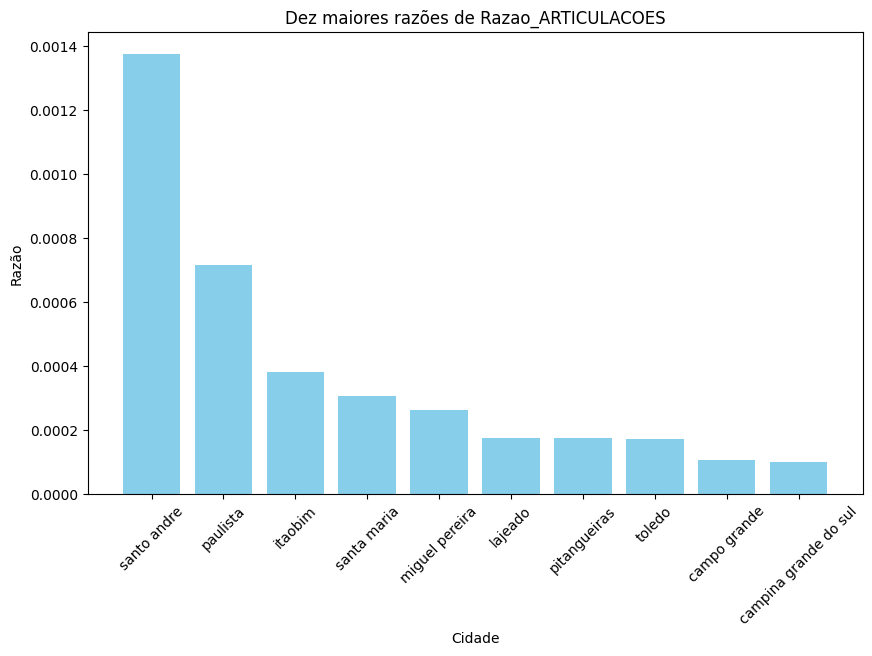

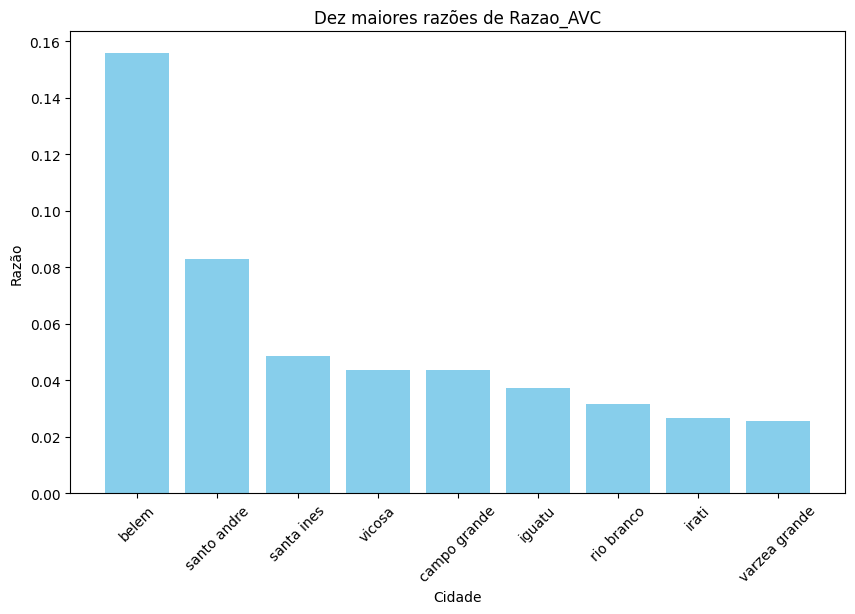

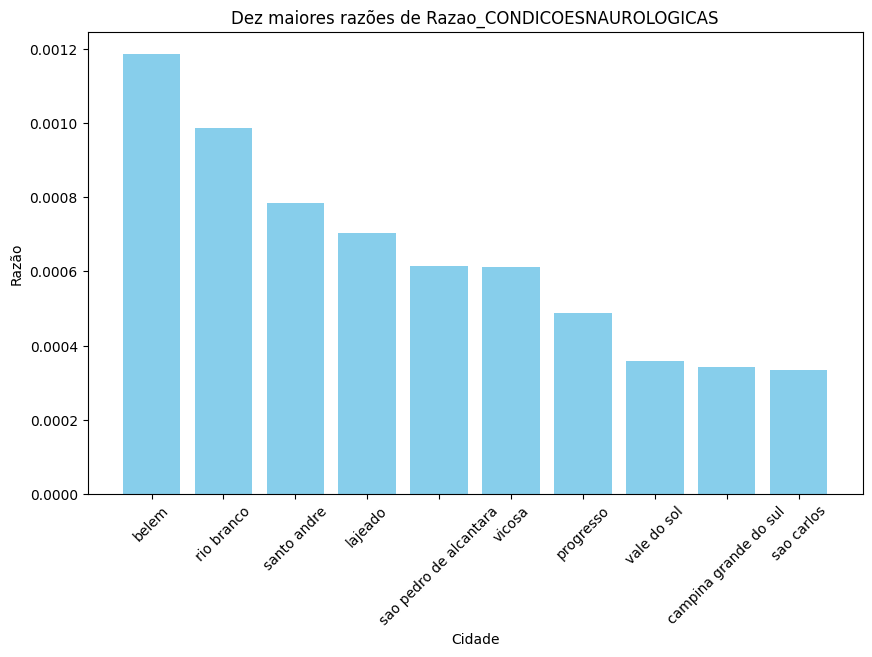

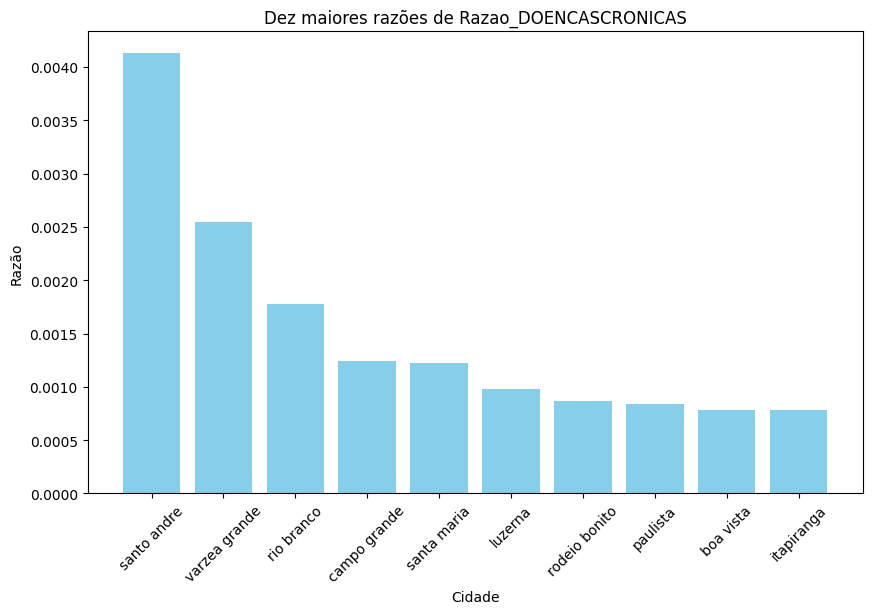

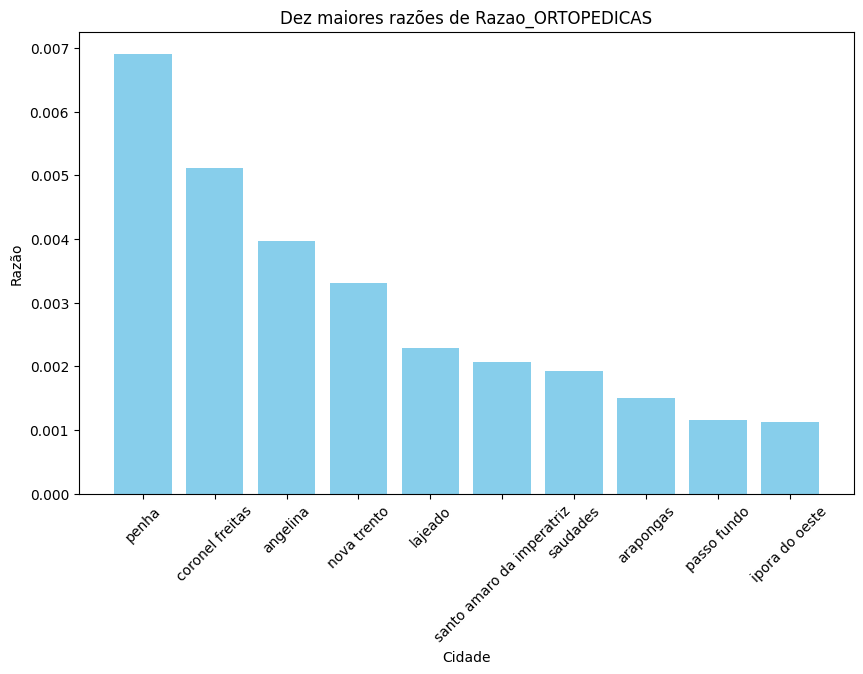

In [229]:
import pandas as pd
import matplotlib.pyplot as plt

# Somando a população por cidade
df_populacao['populacao_total'] = df_populacao.iloc[:, 2:].sum(axis=1)

# Mesclando os dataframes
df_merged = pd.merge(df_procedimentos_hospitalares, df_populacao[['Nome', 'populacao_total']], on='Nome')

# Criando as colunas de razão
df_merged['Razao_ARTICULACOES'] = df_merged['ARTICULACOES'] / df_merged['populacao_total']
df_merged['Razao_AVC'] = df_merged['AVC'] / df_merged['populacao_total']
df_merged['Razao_CONDICOESNAUROLOGICAS'] = df_merged['CONDICOESNAUROLOGICAS'] / df_merged['populacao_total']
df_merged['Razao_DOENCASCRONICAS'] = df_merged['DOENCASCRONICAS'] / df_merged['populacao_total']
df_merged['Razao_ORTOPEDICAS'] = df_merged['ORTOPEDICAS'] / df_merged['populacao_total']

# Plotando os gráficos
tipos_procedimentos = ['Razao_ARTICULACOES', 'Razao_AVC', 'Razao_CONDICOESNAUROLOGICAS', 'Razao_DOENCASCRONICAS', 'Razao_ORTOPEDICAS']
for procedimento in tipos_procedimentos:
    df_sorted = df_merged.nlargest(10, procedimento)
    plt.figure(figsize=(10, 6))
    plt.bar(df_sorted['Nome'], df_sorted[procedimento], color='skyblue')
    plt.ylabel('Razão')
    plt.xlabel('Cidade')
    plt.title(f'Dez maiores razões de {procedimento}')
    plt.xticks(rotation=45)
    plt.show()


In [187]:
# Lista dos municípios e seus respectivos códigos
municipios_codigos = {
    'assu': 240020,
    'balneario de picarras': 421280,
    'barao do monte alto': 310550,
    'embu das artes': 351500,
    'exterior': 0,
    'itapaje': 230630,
    'mogi mirim': 353080,
    'mogi-guacu': 353070,
    'paraiso das aguas': 500627,
    'paraty': 330380,
    'pindare mirim': 210850,
    'pinto bandeira': 431454,
    'poxoreu': 510700,
    'santana do livramento': 431710,
    'sao luiz do paraitinga': 355000
}

# Adiciona os códigos manualmente ao DataFrame df_empresas_qtd
for municipio, codigo in municipios_codigos.items():
    df_empresas_qtd.loc[df_empresas_qtd['Nome'] == municipio, 'Codigo'] = codigo

# Preenche NaNs com 0
df_empresas_qtd['Codigo'] = df_empresas_qtd['Codigo'].fillna(0).astype(int)

# Imprime o DataFrame df_empresas_qtd atualizado
print(df_empresas_qtd)


                  Nome  Qtd empresas  Codigo
0            sao paulo          8488  355030
1       rio de janeiro          1948  330455
2             brasilia          1881  530010
3             curitiba          1641  410690
4       belo horizonte          1051  310620
...                ...           ...     ...
2590            vargem             1  355635
2591            vargem             1  421915
2592          miracema             1  330300
2593           guaimbe             1  351730
2594  laranjal do jari             1  160027

[2595 rows x 3 columns]


In [188]:

# Salva o DataFrame ajustado em um arquivo CSV
df_empresas_qtd.to_csv('df_empresas_qtd.csv', index=False, sep=';')

# Inicia o download do arquivo CSV
files.download('df_empresas_qtd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [189]:
# Iterar sobre os dataframes especificados
for key, df in [('df_procedimentos_hospitalares', df_procedimentos_hospitalares),
                ('df_populacao', df_populacao),
                ('df_acidentes', df_acidentes),
                ('df_planos', df_planos),
                ('df_empresas_qtd', df_empresas_qtd)]:

    print(f"DataFrame: {key}")

    for column, dtype in df.dtypes.iteritems():
        print(f"Coluna: {column} | Tipo de dado: {dtype}")

    print("\n")



DataFrame: df_procedimentos_hospitalares
Coluna: Nome | Tipo de dado: object
Coluna: Codigo | Tipo de dado: object
Coluna: ARTICULACOES | Tipo de dado: float64
Coluna: AVC | Tipo de dado: float64
Coluna: CONDICOESNAUROLOGICAS | Tipo de dado: float64
Coluna: DOENCASCRONICAS | Tipo de dado: float64
Coluna: ORTOPEDICAS | Tipo de dado: float64


DataFrame: df_populacao
Coluna: Nome | Tipo de dado: object
Coluna: Codigo | Tipo de dado: object
Coluna: 20 a 29 anos | Tipo de dado: int64
Coluna: 30 a 39 anos | Tipo de dado: int64
Coluna: 40 a 49 anos | Tipo de dado: int64
Coluna: 50 a 59 anos | Tipo de dado: int64
Coluna: 60 a 69 anos | Tipo de dado: int64
Coluna: 70 a 79 anos | Tipo de dado: int64
Coluna: 80 anos e mais | Tipo de dado: int64
Coluna: Menor que 1 a 9 anos | Tipo de dado: int64
Coluna: 10 a 19 anos | Tipo de dado: int64
Coluna: populacao_total | Tipo de dado: int64


DataFrame: df_acidentes
Coluna: Nome | Tipo de dado: object
Coluna: Codigo | Tipo de dado: object
Coluna: Acident

<ipython-input-189-b7be3649133a>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in df.dtypes.iteritems():


In [190]:
# DataFrame: df_procedimentos_hospitalares
print(df_procedimentos_hospitalares.describe())

# DataFrame: df_populacao
print(df_populacao.describe())

# DataFrame: df_acidentes
print(df_acidentes.describe())

# DataFrame: df_planos
print(df_planos.describe())

# DataFrame: df_planos
print(df_empresas_qtd.describe())


       ARTICULACOES          AVC  CONDICOESNAUROLOGICAS  DOENCASCRONICAS  \
count   2900.000000  2900.000000            2900.000000      2900.000000   
mean       0.271379    61.784138               0.894138         1.036207   
std        2.106628   257.797942               7.071178         6.007044   
min        0.000000     0.000000               0.000000         0.000000   
25%        0.000000     5.000000               0.000000         0.000000   
50%        0.000000    15.000000               0.000000         0.000000   
75%        0.000000    41.000000               0.000000         0.000000   
max       59.000000  8246.000000             213.000000       134.000000   

       ORTOPEDICAS  
count  2900.000000  
mean      4.015862  
std      41.265976  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    1272.000000  
       20 a 29 anos  30 a 39 anos  40 a 49 anos  50 a 59 anos  60 a 69 anos  \
count  5.566000e+03  5.566000e+03  5.566000e+03

In [191]:
print(df_procedimentos_hospitalares.isnull().sum())
print(df_populacao.isnull().sum())
print(df_acidentes.isnull().sum())
print(df_planos.isnull().sum())
print(df_empresas_qtd.isnull().sum())

Nome                     0
Codigo                   0
ARTICULACOES             0
AVC                      0
CONDICOESNAUROLOGICAS    0
DOENCASCRONICAS          0
ORTOPEDICAS              0
dtype: int64
Nome                    0
Codigo                  0
20 a 29 anos            0
30 a 39 anos            0
40 a 49 anos            0
50 a 59 anos            0
60 a 69 anos            0
70 a 79 anos            0
80 anos e mais          0
Menor que 1 a 9 anos    0
10 a 19 anos            0
populacao_total         0
dtype: int64
Nome                     0
Codigo                   0
Acidentes de transito    0
dtype: int64
Nome                    0
Codigo                  0
80 anos e mais          0
Menor que 1 a 9 anos    0
10 a 19 anos            0
20 a 29 anos            0
30 a 39 anos            0
40 a 49 anos            0
50 a 59 anos            0
60 a 69 anos            0
70 a 79 anos            0
dtype: int64
Nome            0
Qtd empresas    0
Codigo          0
dtype: int64


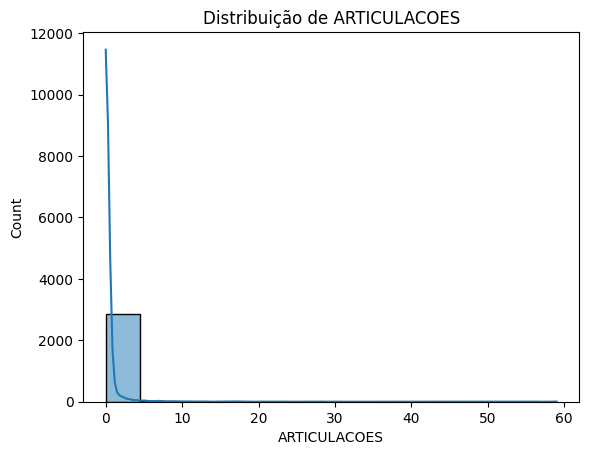

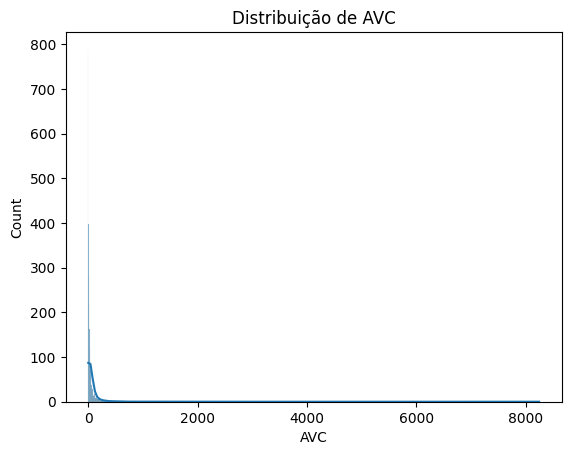

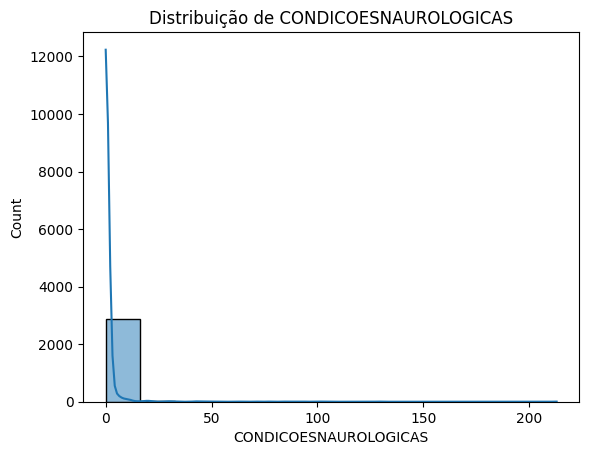

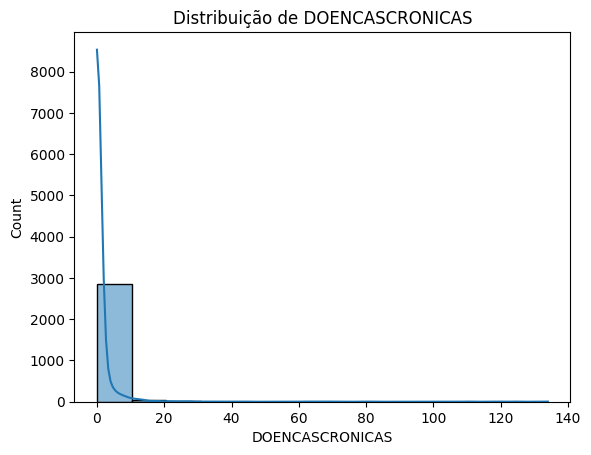

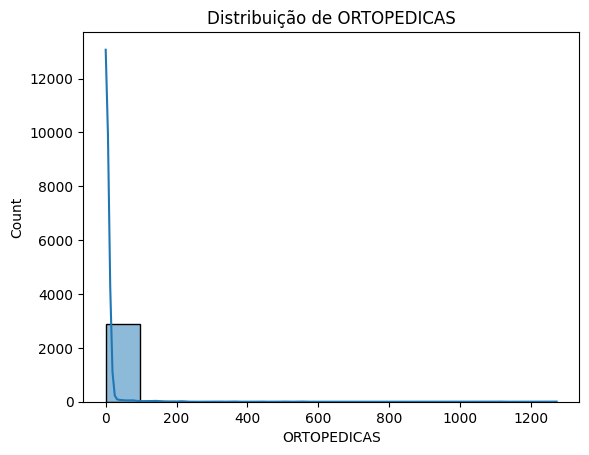

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de colunas de procedimentos hospitalares
for col in df_procedimentos_hospitalares.columns:
    if df_procedimentos_hospitalares[col].dtype == 'float64':
        sns.histplot(df_procedimentos_hospitalares[col], kde=True)
        plt.title(f'Distribuição de {col}')
        plt.show()


<ipython-input-193-0b27b2c574b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_procedimentos_hospitalares.corr()


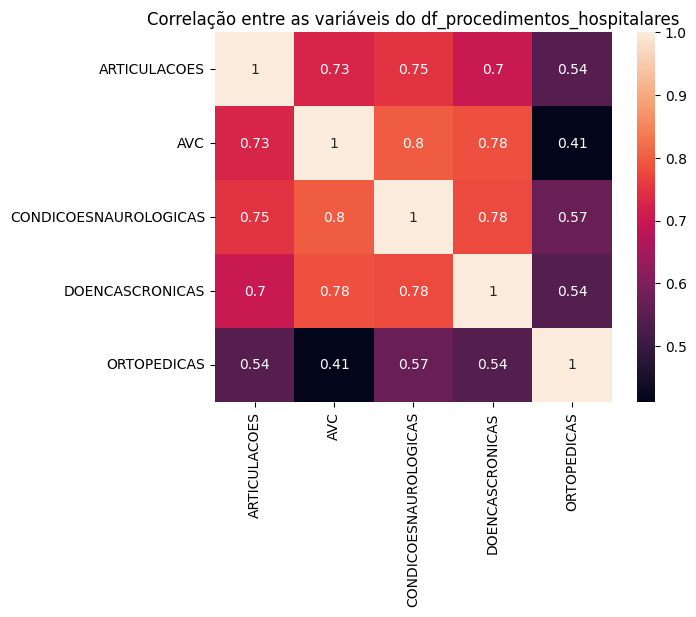

In [193]:
# Correlação entre as colunas de procedimentos hospitalares
corr = df_procedimentos_hospitalares.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlação entre as variáveis do df_procedimentos_hospitalares')
plt.show()


In [194]:
for df in [df_procedimentos_hospitalares, df_acidentes, df_planos, df_empresas_qtd]:
    print(df.groupby('Nome').sum().describe())


       ARTICULACOES          AVC  CONDICOESNAUROLOGICAS  DOENCASCRONICAS  \
count   2811.000000  2811.000000            2811.000000      2811.000000   
mean       0.279972    63.740306               0.922448         1.069015   
std        2.139167   261.822356               7.181557         6.099665   
min        0.000000     0.000000               0.000000         0.000000   
25%        0.000000     5.000000               0.000000         0.000000   
50%        0.000000    16.000000               0.000000         0.000000   
75%        0.000000    44.000000               0.000000         0.000000   
max       59.000000  8246.000000             213.000000       134.000000   

       ORTOPEDICAS  
count  2811.000000  
mean      4.143010  
std      41.908095  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    1272.000000  
       Acidentes de transito
count            1435.000000
mean               84.263415
std              1612.131177
min       

<ipython-input-194-617f16245506>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').sum().describe())
<ipython-input-194-617f16245506>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').sum().describe())
<ipython-input-194-617f16245506>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').sum().describe())


In [195]:
for df in [df_procedimentos_hospitalares, df_acidentes, df_planos, df_empresas_qtd]:
    print(df.groupby('Nome').mean().describe())


<ipython-input-195-6f200b9907d8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').mean().describe())


       ARTICULACOES          AVC  CONDICOESNAUROLOGICAS  DOENCASCRONICAS  \
count   2811.000000  2811.000000            2811.000000      2811.000000   
mean       0.278549    62.496265               0.914799         1.054133   
std        2.138480   260.561682               7.177387         6.088994   
min        0.000000     0.000000               0.000000         0.000000   
25%        0.000000     5.000000               0.000000         0.000000   
50%        0.000000    15.000000               0.000000         0.000000   
75%        0.000000    42.000000               0.000000         0.000000   
max       59.000000  8246.000000             213.000000       134.000000   

       ORTOPEDICAS  
count  2811.000000  
mean      4.141409  
std      41.908161  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    1272.000000  
       Acidentes de transito
count            1435.000000
mean               80.094774
std              1608.084261
min       

<ipython-input-195-6f200b9907d8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').mean().describe())
<ipython-input-195-6f200b9907d8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').mean().describe())


In [196]:
import pandas as pd
from google.colab import files

# Loop para calcular a média por município e obter a descrição
dataframes = [df_procedimentos_hospitalares, df_acidentes, df_planos, df_empresas_qtd]
dfs_mean_describe = []

for df in dataframes:
    mean_describe = df.groupby('Nome').mean().describe()
    dfs_mean_describe.append(mean_describe)

# Concatenar os dataframes em uma única tabela
result = pd.concat(dfs_mean_describe, axis=0)

# Salvar os dados em um arquivo Excel
result.to_excel('resultados.xlsx', index=True)

# Fazer o download do arquivo Excel
files.download('resultados.xlsx')


<ipython-input-196-a1ecd91a391f>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_describe = df.groupby('Nome').mean().describe()
<ipython-input-196-a1ecd91a391f>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_describe = df.groupby('Nome').mean().describe()
<ipython-input-196-a1ecd91a391f>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_describe = df.groupby('Nome').mean().describe()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

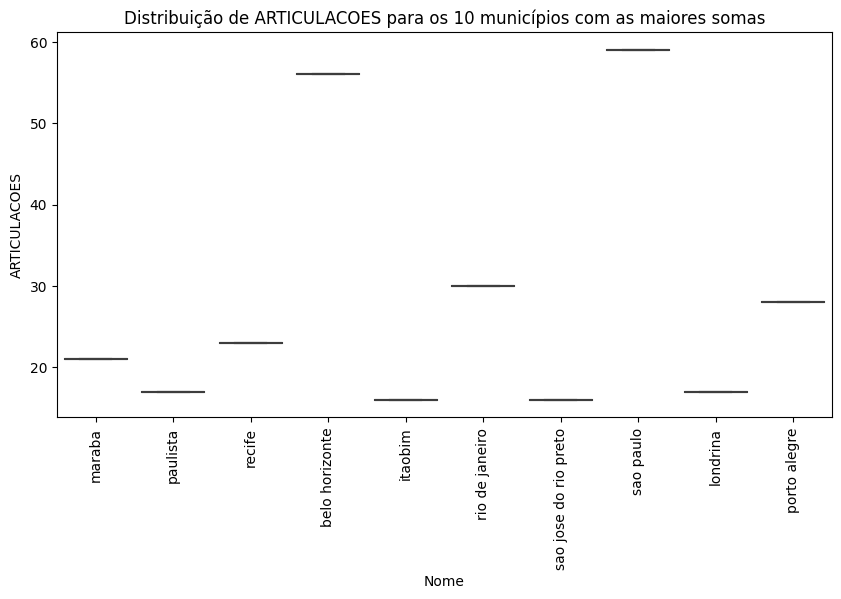

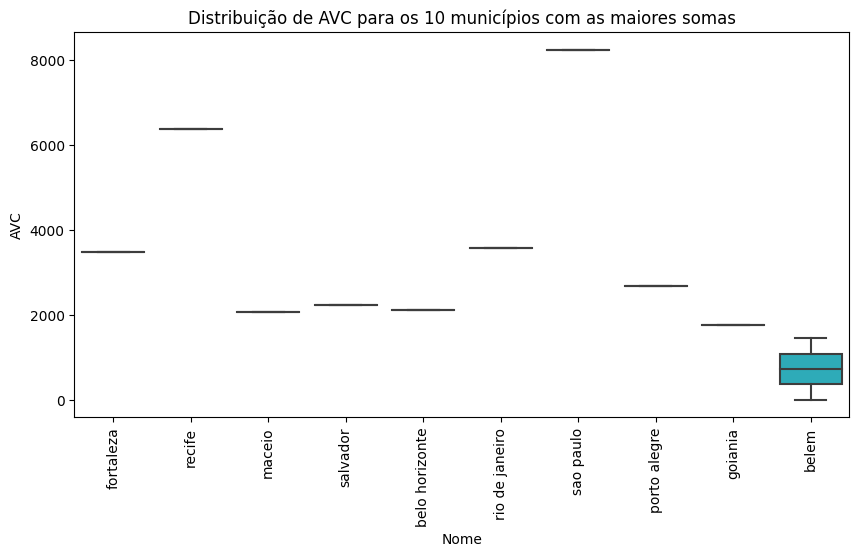

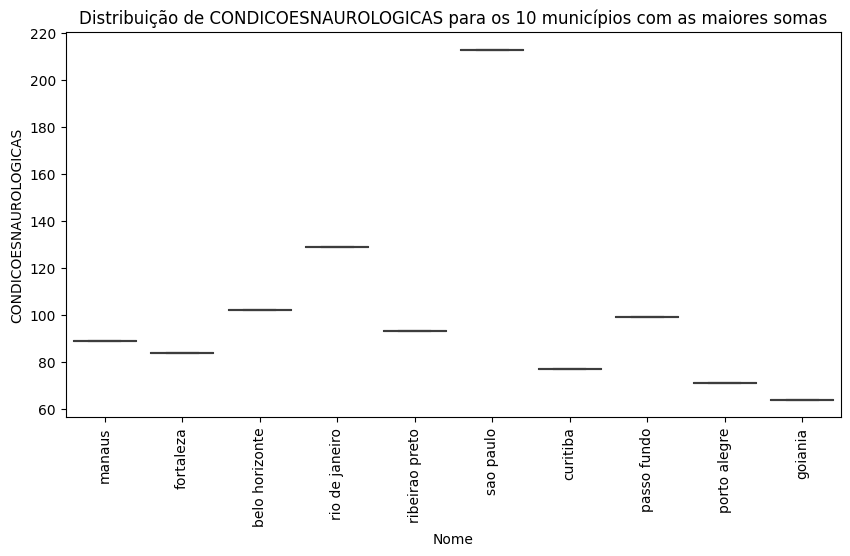

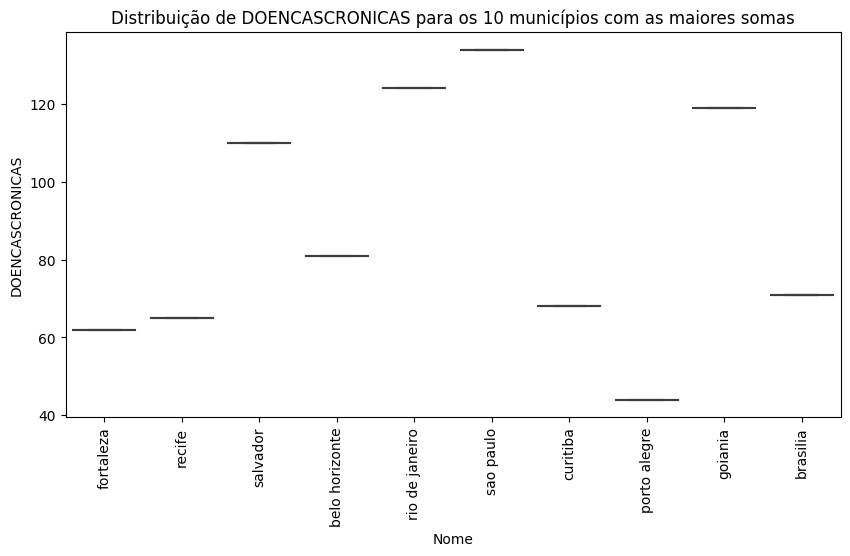

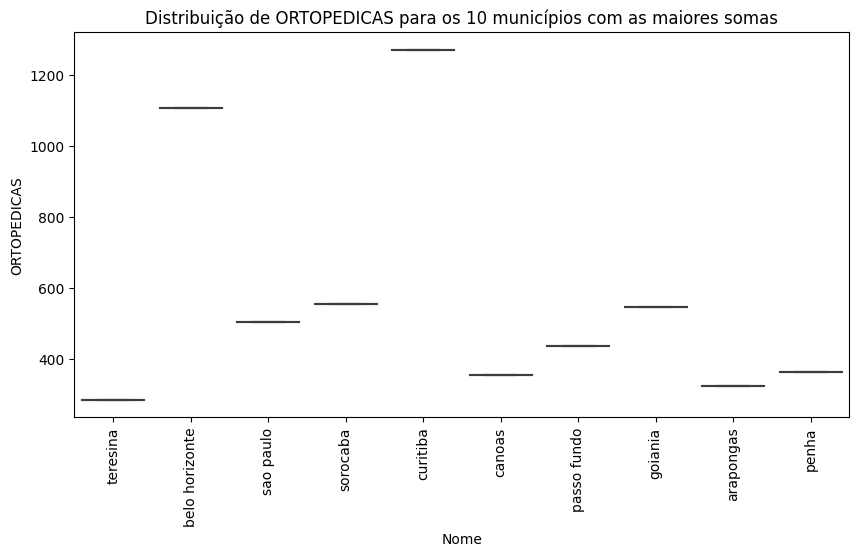

In [197]:
# Para cada coluna do dataframe
for col in df_procedimentos_hospitalares.drop(['Nome', 'Codigo'], axis=1).columns:

    # Calcula a soma por município
    municipios_soma = df_procedimentos_hospitalares.groupby('Nome')[col].sum()

    # Seleciona os 10 municípios com as maiores somas
    top_10_municipios = municipios_soma.nlargest(10).index
    df_top_10 = df_procedimentos_hospitalares[df_procedimentos_hospitalares['Nome'].isin(top_10_municipios)]

    # Plota o boxplot para os municípios com as maiores somas
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Nome', y=col, data=df_top_10)
    plt.title(f'Distribuição de {col} para os 10 municípios com as maiores somas')
    plt.xticks(rotation=90)
    plt.show()

In [198]:
# URL do arquivo .shp
url = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Municipios_2021.zip"

In [199]:
# Fazendo download do arquivo
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))

# Extraindo o arquivo
z.extractall(path="/content/")  # ou qualquer outro caminho onde você deseja colocar o arquivo

# Carregando o arquivo de formato geoespacial com as geometrias dos municípios
brasil = gpd.read_file('/content/BR_Municipios_2021.shp')

In [200]:
# Se 'NM_MUN' estiver no DataFrame e for do tipo 'object' (string), faça o ajuste
if 'NM_MUN' in brasil.columns and brasil['NM_MUN'].dtype == 'object':
    brasil['NM_MUN'] = brasil['NM_MUN'].apply(lambda x: unidecode.unidecode(x).lower())
    print(f"Coluna 'NM_MUN' ajustada.")
else:
    print("Coluna 'NM_MUN' não encontrada ou o tipo de dado não é 'string'.")

Coluna 'NM_MUN' ajustada.


In [201]:
print(brasil.columns)

Index(['CD_MUN', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry'], dtype='object')


In [202]:
# Convertendo a coluna 'NM_MUN' para minúsculo
brasil['NM_MUN'] = brasil['NM_MUN'].str.lower()

# Mudando o índice do dataframe 'df_empresas_qtd' para 'Nome'
df_empresas_qtd_indexed = df_empresas_qtd.set_index('Nome')

# Unindo o dataframe geoespacial com os dados de quantidade de empresas
mapa = brasil.merge(df_empresas_qtd_indexed, how='left', left_on='NM_MUN', right_index=True)

# Substituindo os valores NaN por 0
mapa['Qtd empresas'] = mapa['Qtd empresas'].fillna(0)

# Removendo a coluna 'Codigo'
mapa = mapa.drop(columns=['Codigo'])



In [203]:
print(mapa.isnull().sum())


CD_MUN          0
NM_MUN          0
SIGLA           0
AREA_KM2        0
geometry        0
Qtd empresas    0
dtype: int64


In [204]:
# Salvar os dados da coluna 'NM_MUN' em um novo DataFrame
df_nm_mun = brasil[['NM_MUN']]

# Escrever o DataFrame para um arquivo CSV
df_nm_mun.to_csv('nm_mun.csv', index=False)

# Baixar o arquivo CSV para o seu computador
from google.colab import files
files.download('nm_mun.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

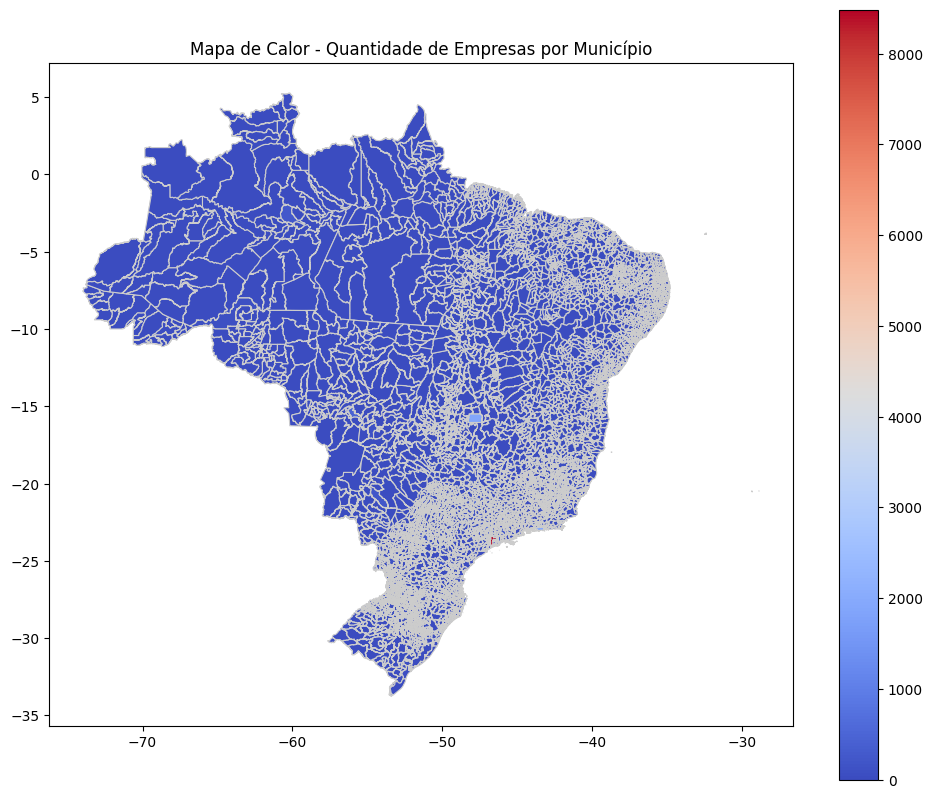

In [205]:
import matplotlib.pyplot as plt

# Plotando o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa.plot(column='Qtd empresas', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Mapa de Calor - Quantidade de Empresas por Município')
plt.show()

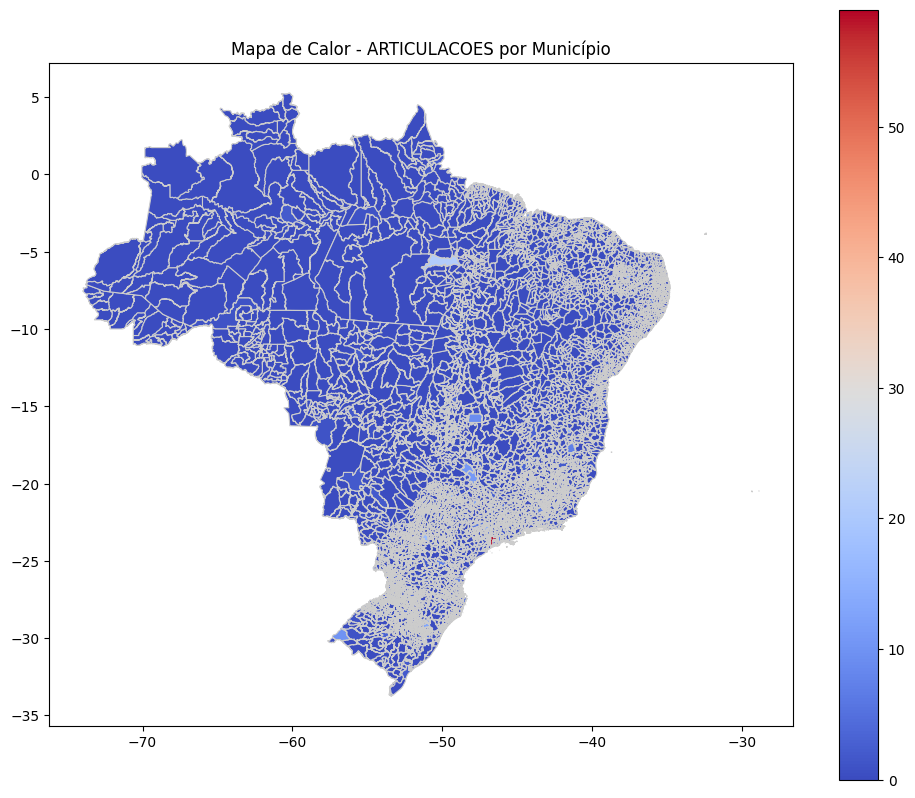

In [234]:
import matplotlib.pyplot as plt

def plot_heatmap(df, geo_df, procedure):
    # Verificando se o procedimento existe nas colunas do dataframe
    if procedure not in df.columns:
        print(f'O procedimento {procedure} não foi encontrado.')
        return

    # Mudando o índice do dataframe para 'Nome'
    df_indexed = df.set_index('Nome')

    # Unindo o dataframe geoespacial com os dados de procedimentos hospitalares
    mapa = geo_df.merge(df_indexed, how='left', left_on='NM_MUN', right_index=True)

    # Substituindo os valores NaN por 0
    mapa[procedure] = mapa[procedure].fillna(0)

    # Plotando o mapa de calor
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    mapa.plot(column=procedure, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.title(f'Mapa de Calor - {procedure} por Município')
    plt.show()

# Agora você pode chamar a função para cada tipo de procedimento que quiser visualizar:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'ARTICULACOES')



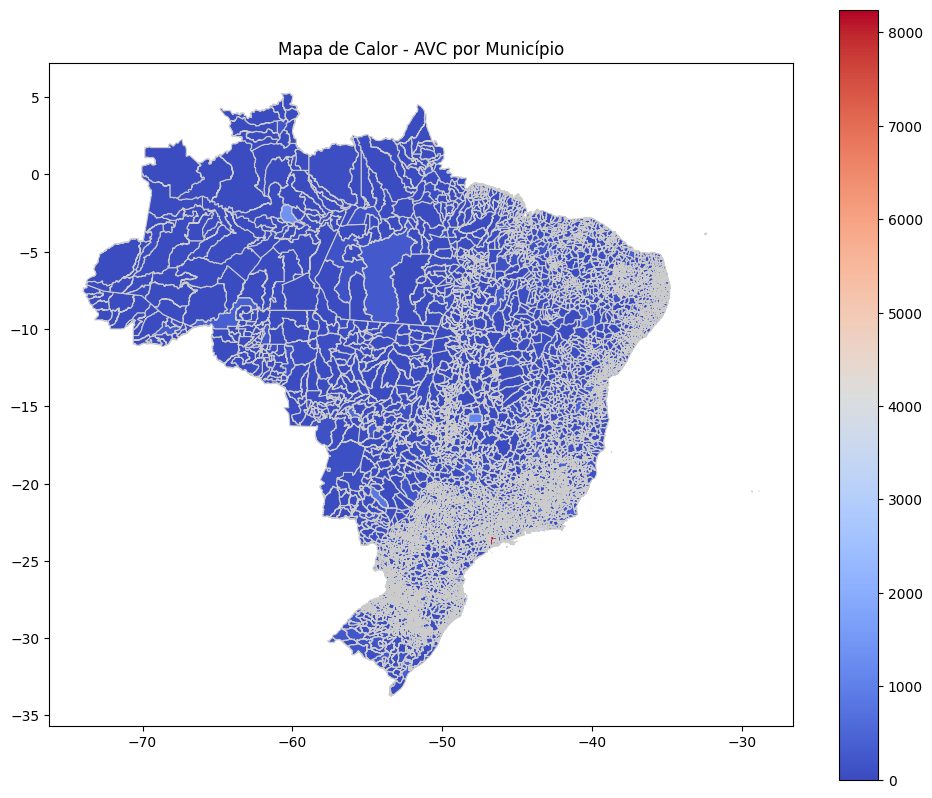

In [235]:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'AVC')


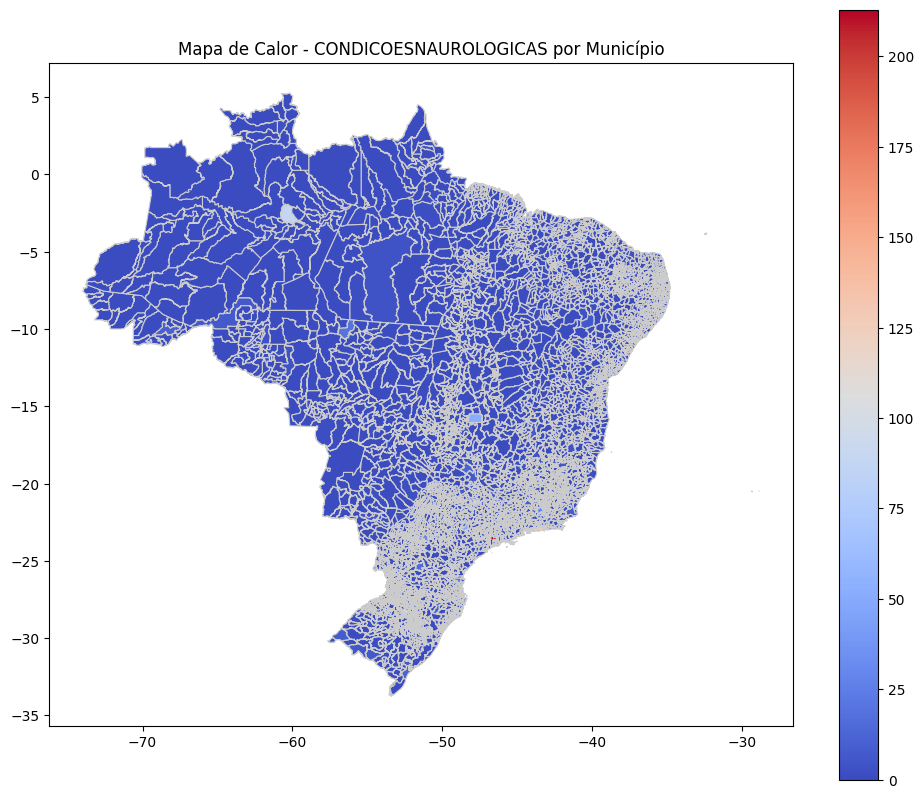

In [236]:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'CONDICOESNAUROLOGICAS')


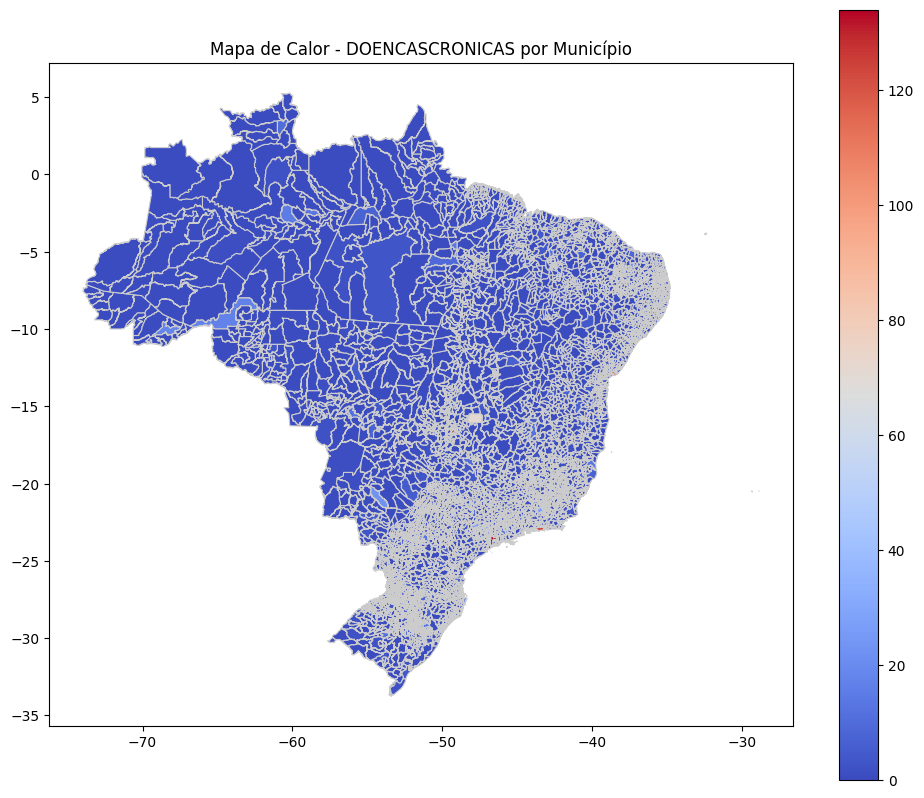

In [237]:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'DOENCASCRONICAS')


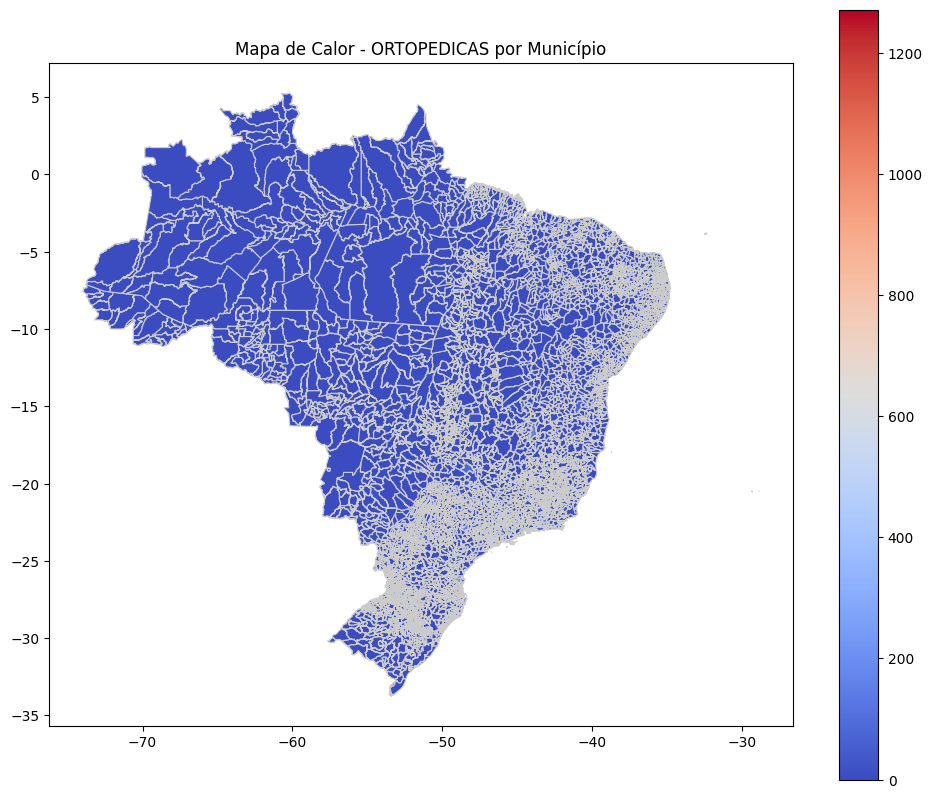

In [238]:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'ORTOPEDICAS')

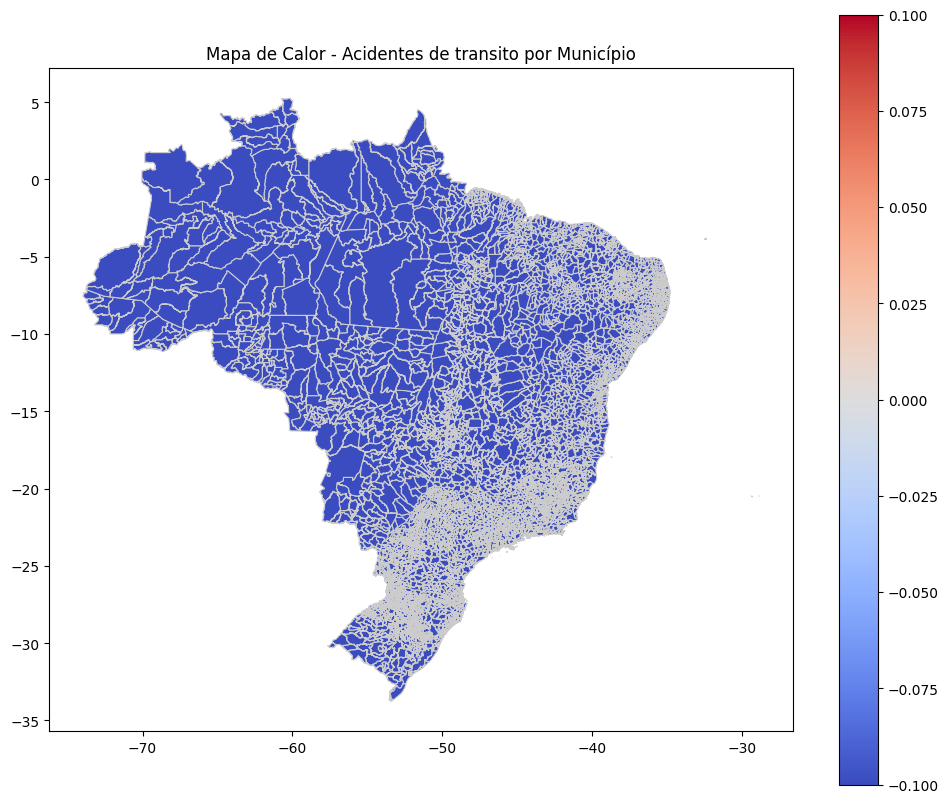

In [239]:
plot_heatmap(df_acidentes, brasil, 'Acidentes de transito')


<ipython-input-206-835d3dd1d017>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  municipios_soma = df_procedimentos_hospitalares.groupby('Nome').sum()


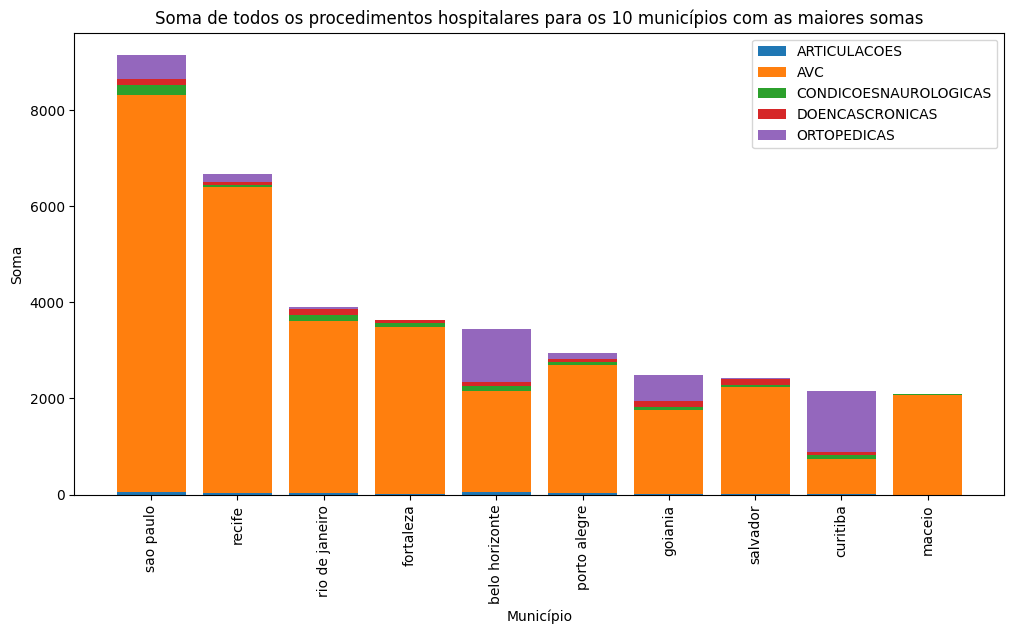

In [206]:
import numpy as np

# Calcular a soma por município
municipios_soma = df_procedimentos_hospitalares.groupby('Nome').sum()

# Seleciona os 10 municípios com as maiores somas
top_10_municipios = municipios_soma.sum(axis=1).nlargest(10).index
df_top_10 = municipios_soma.loc[top_10_municipios]

# Cria um novo gráfico
fig, ax = plt.subplots(figsize=(12,6))

# Adicionar barras para cada coluna
bottom = np.zeros(len(df_top_10))
for col in df_top_10.columns:
    ax.bar(df_top_10.index, df_top_10[col], bottom=bottom, label=col)
    bottom += np.array(df_top_10[col])

# Adicionar legendas e título
ax.set_xlabel('Município')
ax.set_ylabel('Soma')
ax.set_title('Soma de todos os procedimentos hospitalares para os 10 municípios com as maiores somas')
ax.legend()

# Rotacionar os nomes dos municípios para melhor visualização
plt.xticks(rotation=90)
plt.show()


Dropdown(description='Procedimento:', options=('ARTICULACOES', 'AVC', 'CONDICOESNAUROLOGICAS', 'DOENCASCRONICA…

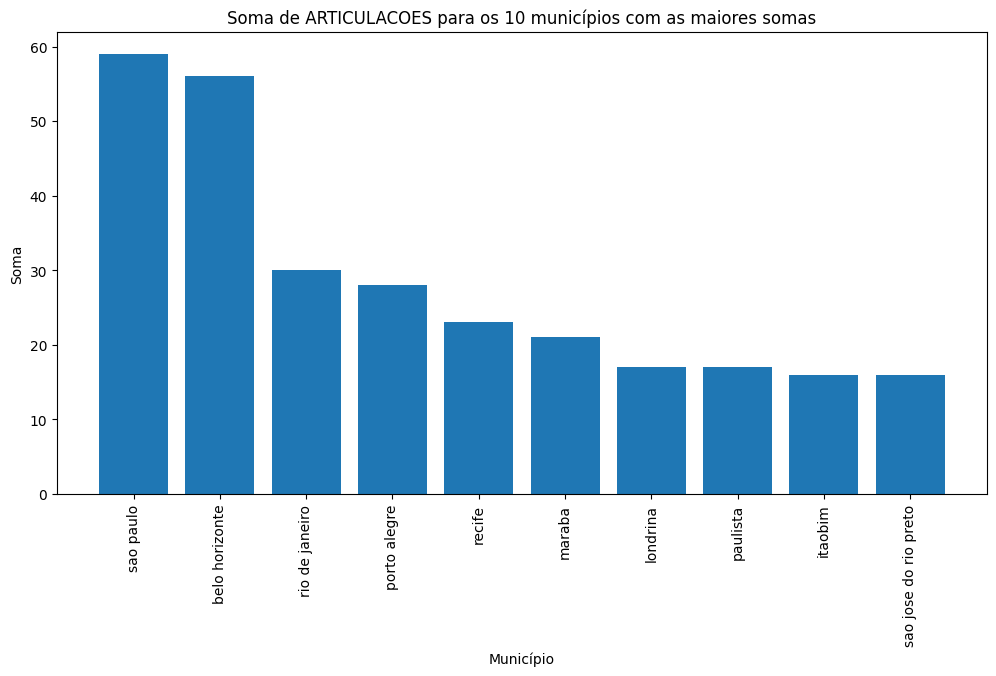

In [207]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

# Criando um widget Dropdown para selecionar o tipo de procedimento hospitalar
procedimentos_dropdown = widgets.Dropdown(
    options=df_procedimentos_hospitalares.columns[2:],  # Ignorando as colunas 'Nome' e 'Codigo'
    value=df_procedimentos_hospitalares.columns[2],  # Valor inicial
    description='Procedimento:',
)

def update_grafico(procedimento):
    # Calcula a soma por município para o procedimento selecionado
    municipios_soma = df_procedimentos_hospitalares.groupby('Nome')[procedimento].sum()

    # Seleciona os 10 municípios com as maiores somas
    top_10_municipios = municipios_soma.nlargest(10).index

    # Cria um novo gráfico
    plt.figure(figsize=(12, 6))

    # Plotando as barras
    plt.bar(top_10_municipios, municipios_soma.loc[top_10_municipios])

    # Adicionando legendas e título
    plt.xlabel('Município')
    plt.ylabel('Soma')
    plt.title(f'Soma de {procedimento} para os 10 municípios com as maiores somas')

    # Rotacionar os nomes dos municípios para melhor visualização
    plt.xticks(rotation=90)
    plt.show()

# Função que será chamada quando o valor do widget dropdown mudar
def dropdown_eventhandler(change):
    update_grafico(change.new)

# Associa o manipulador de eventos ao widget
procedimentos_dropdown.observe(dropdown_eventhandler, names='value')

# Exibindo o widget
display(procedimentos_dropdown)

# Exibindo o gráfico inicial
update_grafico(procedimentos_dropdown.value)


In [208]:
# DataFrame: df_procedimentos_hospitalares
print(df_procedimentos_hospitalares.describe())

# DataFrame: df_populacao
print(df_populacao.describe())

# DataFrame: df_acidentes
print(df_acidentes.describe())

# DataFrame: df_planos
print(df_planos.describe())

# DataFrame: df_planos
print(df_empresas_qtd.describe())


       ARTICULACOES          AVC  CONDICOESNAUROLOGICAS  DOENCASCRONICAS  \
count   2900.000000  2900.000000            2900.000000      2900.000000   
mean       0.271379    61.784138               0.894138         1.036207   
std        2.106628   257.797942               7.071178         6.007044   
min        0.000000     0.000000               0.000000         0.000000   
25%        0.000000     5.000000               0.000000         0.000000   
50%        0.000000    15.000000               0.000000         0.000000   
75%        0.000000    41.000000               0.000000         0.000000   
max       59.000000  8246.000000             213.000000       134.000000   

       ORTOPEDICAS  
count  2900.000000  
mean      4.015862  
std      41.265976  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    1272.000000  
       20 a 29 anos  30 a 39 anos  40 a 49 anos  50 a 59 anos  60 a 69 anos  \
count  5.566000e+03  5.566000e+03  5.566000e+03

In [246]:
import pandas as pd

df_procedimentos_hospitalares.reset_index(inplace=True)
df_populacao.reset_index(inplace=True)
df_acidentes.reset_index(inplace=True)
df_empresas_qtd.reset_index(inplace=True)

# Combina os dataframes em um único dataframe
df_procedimentos_hospitalares.set_index(['Nome', df_procedimentos_hospitalares.groupby('Nome').cumcount()], inplace=True)
df_populacao.set_index(['Nome', df_populacao.groupby('Nome').cumcount()], inplace=True)
df_acidentes.set_index(['Nome', df_acidentes.groupby('Nome').cumcount()], inplace=True)
df_empresas_qtd.set_index(['Nome', df_empresas_qtd.groupby('Nome').cumcount()], inplace=True)

df_potencial = pd.concat([df_procedimentos_hospitalares, df_populacao, df_acidentes, df_empresas_qtd], axis=1)

# Cria uma nova coluna para o total de acidentes, somando todas as colunas relevantes
df_potencial['total_acidentes'] = df_potencial['ARTICULACOES'] + df_potencial['AVC'] + df_potencial['CONDICOESNAUROLOGICAS'] + df_potencial['DOENCASCRONICAS'] + df_potencial['ORTOPEDICAS'] + df_potencial['Acidentes de transito']

# Calcula a taxa de acidentes por pessoa
df_potencial['taxa_acidentes'] = df_potencial['total_acidentes'] / df_potencial['populacao_total']

# Calcula a taxa de empresas por pessoa
df_potencial['taxa_empresas'] = df_potencial['Qtd empresas'] / df_potencial['populacao_total']

# Supõe-se que cada clínica pode tratar 500 acidentes por ano
acidentes_por_clinica = 500

# Calcula o número ideal de clínicas
df_potencial['IC'] = df_potencial['total_acidentes'] / acidentes_por_clinica

# Agora df_potencial tem as taxas de acidentes e empresas por pessoa para cada nome de região
# e o número ideal de clínicas baseado na suposição de acidentes por clínica.


ValueError: ignored

NameError: ignored

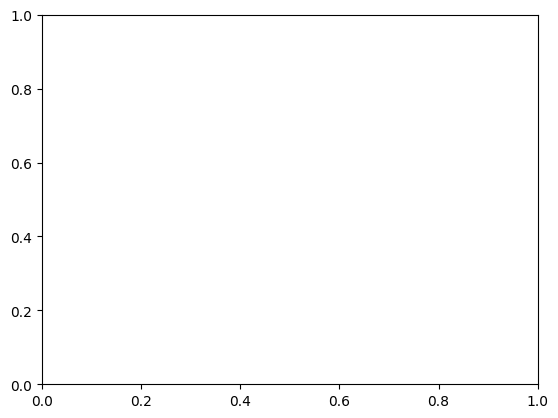

In [243]:
plot_heatmap(df_potencial, brasil, 'IC')